# Objective: cluster people into k groups by height and weight

In [ ]:
#import libraries and show data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

#data : from 
#https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex
# height and weight of 500 person
df = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [ ]:
#define x, y

x=df[df.columns[1:3]]
y=df[df.columns[3]]
print('X:', x.shape)
print('y:', y.shape)

X: (500, 2)
y: (500,)


In [ ]:
# k mean

from sklearn.cluster import KMeans
from tqdm import tqdm

# Run K-means for a set of k
distortions = []
models = []
k = range(1,10+1)
for k in tqdm(k):
    model = KMeans(n_clusters=k)
    model.fit(x)
    models.append(model)
    distortions.append(model.inertia_)

100%|██████████| 10/10 [00:00<00:00, 17.04it/s]


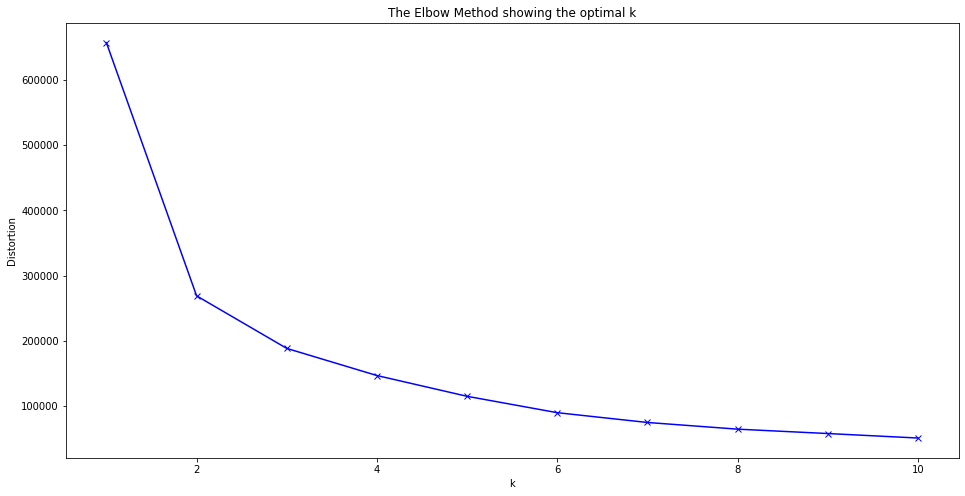

In [ ]:
#plot elbow method

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# choose k = 3

model = KMeans(n_clusters=3)
# we only put X (not y)
model.fit(x)

# try predict the cluster of X
y_pred = model.predict(x)


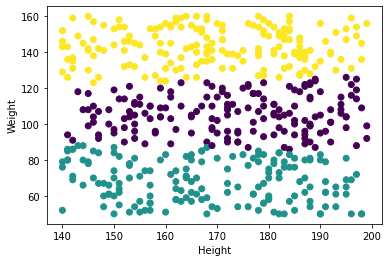

In [ ]:
#plot k = 3 cluster

import matplotlib.pyplot as plt
# we use scatter plot
# c=y; we color the dots by clusters
plt.scatter(df['Height'], df['Weight'], c=y_pred)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [ ]:
#vary k from 1 to 10

from sklearn.preprocessing import StandardScaler # MaxAbsScaler and Normalizer are other examples
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn import metrics

K = range(1,10+1)
for k in tqdm(K):  
  scaler = StandardScaler()
  kmeans = KMeans(n_clusters=k)
  pipeline = make_pipeline(scaler, kmeans)
  pipeline.fit(x)
  y_pred = pipeline.predict(x)
  print('')
  print('k=', k)
  print('ARI:', metrics.adjusted_rand_score(y, y_pred))
  print('inertia:', kmeans.inertia_)

 50%|█████     | 5/10 [00:00<00:00, 22.69it/s]


k= 1
ARI: 0.0
inertia: 1000.0

k= 2
ARI: 0.08563433907902653
inertia: 627.4189642897767

k= 3
ARI: 0.2320050521460932
inertia: 391.6549309912418

k= 4
ARI: 0.2620280882991438
inertia: 255.09809585270608

k= 5
ARI: 0.28873409021099633
inertia: 212.79213029168108


 70%|███████   | 7/10 [00:00<00:00, 18.95it/s]


k= 6
ARI: 0.2914334523058974
inertia: 177.11356727552527

k= 7
ARI: 0.23014669357858167
inertia: 147.74274570671238

k= 8
ARI: 0.21885911246937934
inertia: 121.44399730732917


100%|██████████| 10/10 [00:00<00:00, 15.41it/s]


k= 9
ARI: 0.20923867231870574
inertia: 104.56582532201881

k= 10
ARI: 0.22309459269909637
inertia: 94.97958330720645


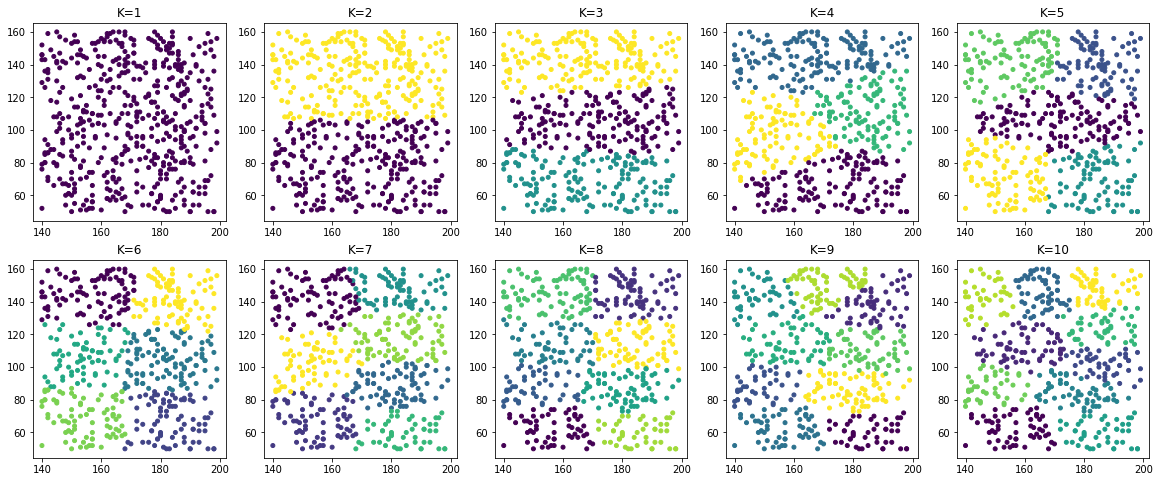

In [ ]:
#plot k from 1 to 10

fig, ax = plt.subplots(2, 5, figsize=(20, 8))
ax = [*ax[0], *ax[1]]
for k, model, ax in zip(K, models, ax):
  y_pred = model.predict(x)
  ax.set_title(f'K={k}')
  ax.scatter(df['Height'],df['Weight'], c=y_pred, s=16)